In [236]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorly as tl

from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler

In [237]:
filename = "./Data.xlsx"

In [238]:
def get_data(filename=filename):
    list1 = pd.read_excel(filename, '1', engine='openpyxl')
    list2 = pd.read_excel(filename, '2', engine='openpyxl')
    list3 = pd.read_excel(filename, '3', engine='openpyxl')

    newdf1 = list1.append(list2, ignore_index=True)
    newdf1 = newdf1.append(list3, ignore_index=True)    

    Q1 = newdf1.quantile(0.25)
    Q3 = newdf1.quantile(0.75)
    IQR = Q3 - Q1

    newdf = newdf1[~((newdf1 < (Q1 - 1.5 * IQR)) | (newdf1 > (Q3 + 1.5 * IQR))).any(axis=1)]

    newdf = pd.DataFrame(StandardScaler().fit_transform(newdf))

    return newdf

In [320]:
sample = get_data().to_numpy()
print(sample.shape)
sample = np.transpose(np.split(sample[:81], 3))
#sample = np.split(sample[:81], 9)
print(sample.shape)

(83, 10)
(10, 27, 3)


In [240]:
pca = PCA(n_components=10)

In [241]:
print(get_data().to_numpy())

[[-1.07904538e+00 -1.13905989e+00 -9.79458286e-01 -1.10059488e+00
  -1.00960827e+00 -9.78562417e-01 -8.63006178e-01 -9.76487214e-01
  -9.38258714e-01 -9.25530975e-01]
 [-3.09309682e-01 -7.40454591e-01  2.05041775e-01 -8.45882391e-01
   3.43711372e-01  3.11990442e-01  2.15960474e+00  1.76873305e+00
  -8.53524485e-01 -3.25346450e-01]
 [-6.04348880e-01 -7.49482379e-01 -4.66816127e-01 -8.59762250e-01
  -4.93531540e-01 -8.52442305e-01  2.30522654e+00 -3.47657379e-01
   3.09299693e+00 -9.25530975e-01]
 [-1.04406078e+00  1.26420229e+00 -1.17906044e+00 -4.12750062e-01
  -1.00960827e+00 -9.85841411e-01  5.25312413e-02  3.95380563e-01
  -5.39237526e-01 -8.90411007e-01]
 [-3.88397733e-01 -1.14117451e+00 -5.74667141e-01 -6.03481679e-01
  -9.60914892e-01 -7.85860630e-01 -8.73948856e-01 -5.17289048e-01
  -9.42195860e-01 -9.25530975e-01]
 [-8.41681840e-01 -1.14117451e+00 -7.38716752e-01 -8.68285787e-01
  -5.95714550e-01 -5.78600854e-01 -7.23588350e-01  2.67695900e-01
  -9.42195860e-01 -9.25530975e-01

In [242]:
pca = pca.fit(get_data().to_numpy())

<BarContainer object of 10 artists>

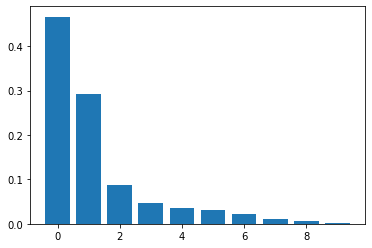

In [243]:
pca.explained_variance_ratio_
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)  # дисперсии, являющиеся собственными значениями

In [321]:
X = tl.tensor(sample)

In [322]:
from tensorly.decomposition import parafac

In [323]:
weights, factors = parafac(X, rank=10)

In [324]:
print(factors)

[array([[ 0.34028159,  0.57532384, -3.13485615,  0.77588344, -1.31529698,
        -0.62531796, -2.44197655,  0.82982965,  0.55202357, -3.65997964],
       [ 4.1784301 , -2.01065861, -2.03767322, -0.18018632, -0.18025788,
        -1.04010396, -0.72793247,  0.9761093 ,  0.73978067, -1.93770099],
       [-0.38216183,  1.01839193, -3.07424509,  1.21515337, -1.15258349,
        -0.11730351, -2.71847829,  0.67441319,  0.42105899, -3.16475125],
       [ 3.16305711, -1.92685137, -2.49596396,  0.13847183,  0.11966342,
        -0.70392746, -1.54805414,  0.88997959,  0.80851683, -2.38234121],
       [ 3.77660628, -2.51376168, -1.6003626 ,  3.19072626, -0.7954194 ,
         3.37655397, -0.54753398, -0.16110338,  0.346387  ,  4.81120858],
       [ 2.17395112, -0.69508769, -2.54420377,  2.44608044, -1.36077519,
         1.70113954, -2.00578168,  0.24098216,  0.29483628,  0.77805334],
       [ 4.18491986, -1.61340813, -2.73235983, -0.00736848,  3.24031592,
        -0.37267224, -2.4619028 ,  1.2791975

In [325]:
print(*[factor.shape for factor in factors])

(10, 10) (27, 10) (3, 10)


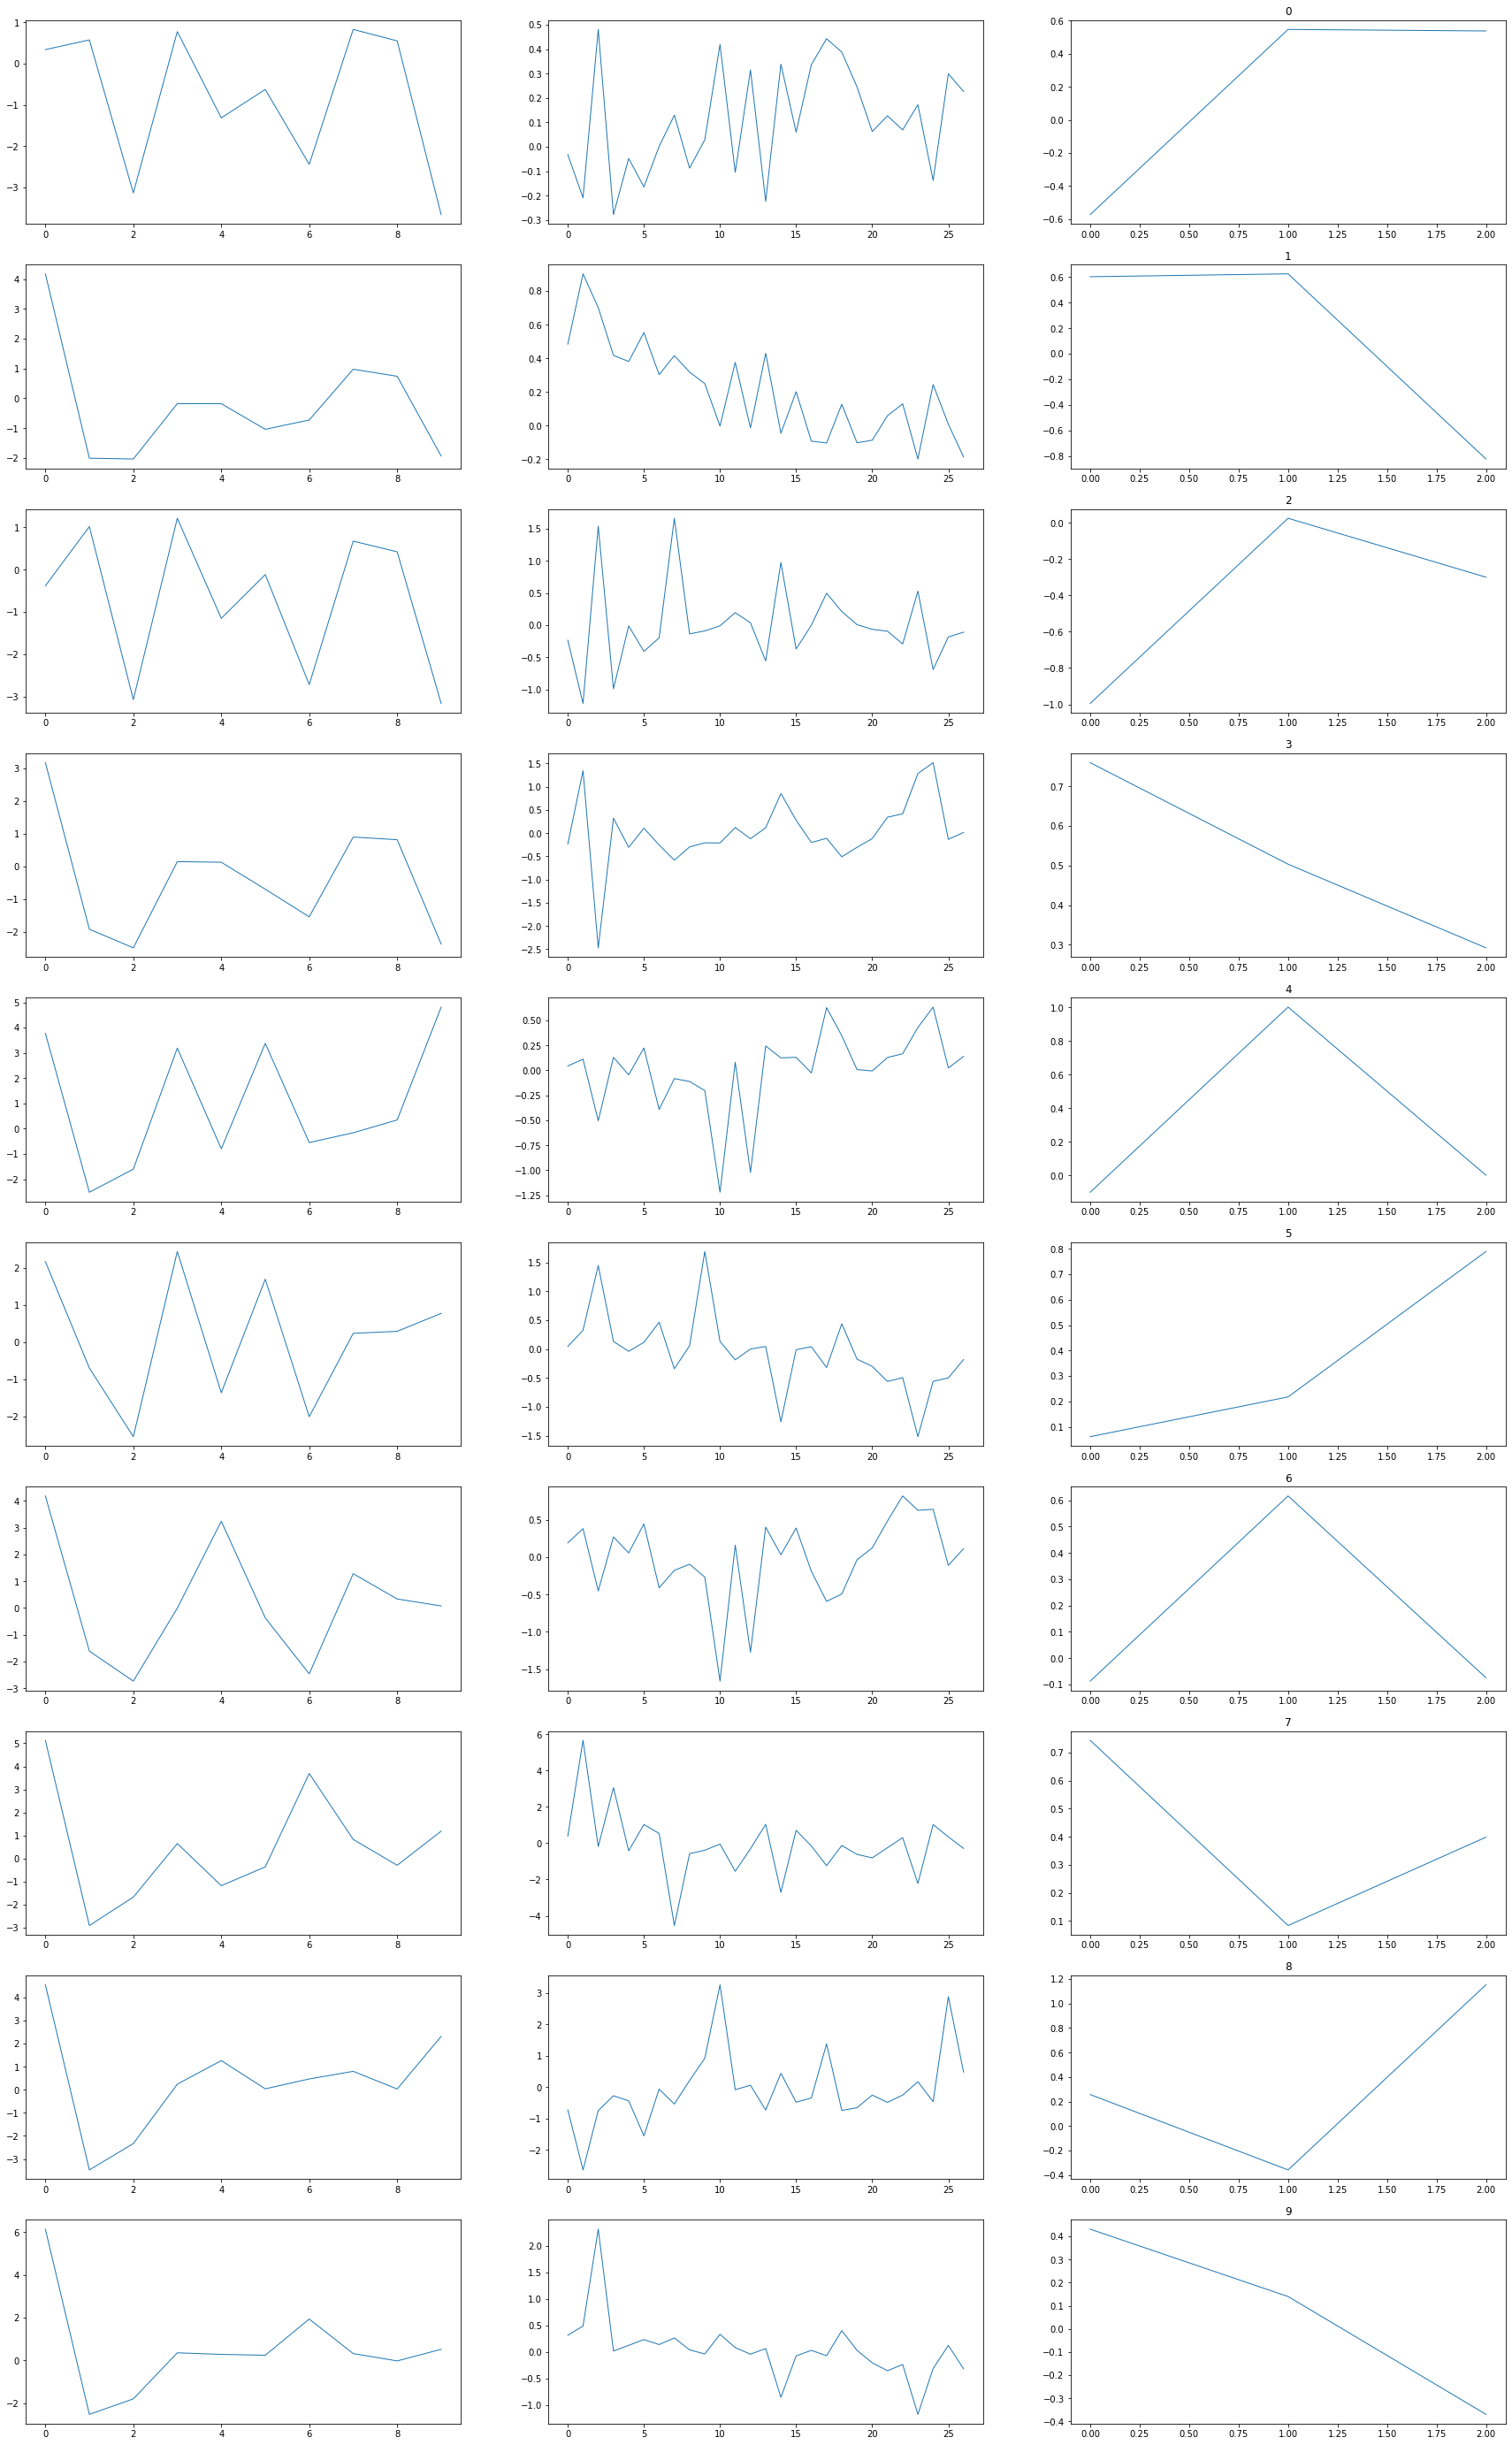

In [326]:
fig, ax = plt.subplots(nrows=len(factors[0]), ncols=3, figsize=(30,50))

for i in range(len(factors[0])):
    ax[i, 0].plot(factors[0][i],linewidth=1)
    ax[i, 1].plot(factors[1][:, i],linewidth=1)
    ax[i, 2].plot(factors[2][:, i],linewidth=1)
    ax[i, 2].title.set_text(str(i))
    #plt.show()

In [287]:
data = get_data().to_numpy()

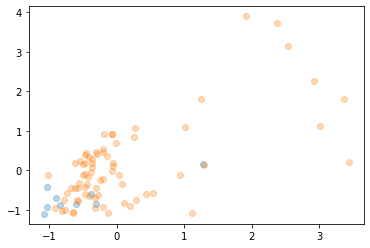

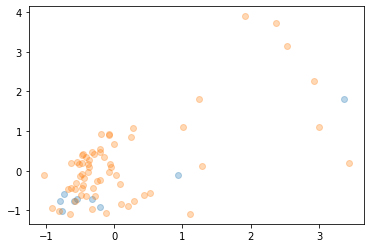

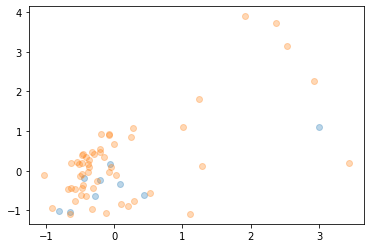

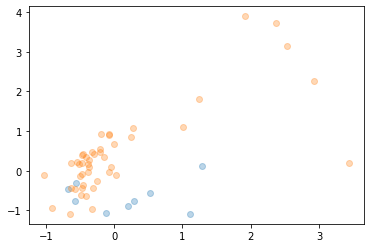

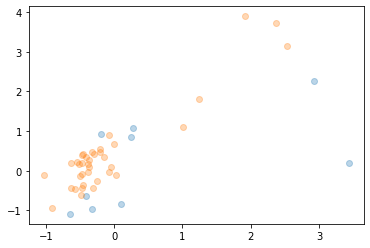

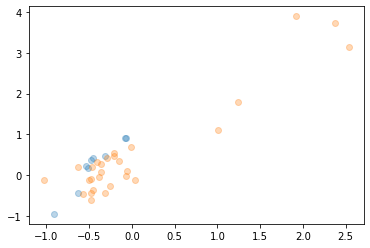

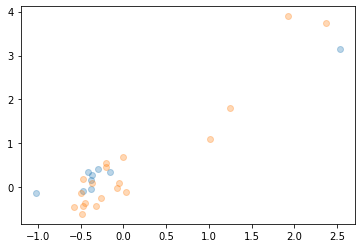

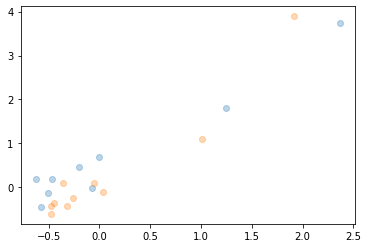

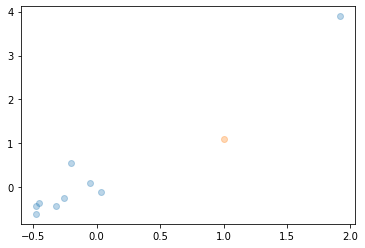

In [288]:
k = 9
for i in range(81//k):
    plt.scatter(data[k*i:k*(i+1), 0], data[k*i:k*(i+1), 3], alpha=0.3)
    plt.scatter(data[k*(i+1)+1:, 0], data[k*(i+1)+1:, 3], alpha=0.3)
    #print(data[k*i:k*(i+1),2], "-", data[k*i:k*(i+1),3])
    #print(data[k*(i+1):, 2], "-", data[k*(i+1):, 3])
    #print("\n\n")
    plt.show()

In [ ]:
for i in range(8-1):
    plt.scatter(data[14*i:14*(i+1),0], data[14*i:14*(i+1),9], alpha=0.3)
    plt.scatter(data[14*(i+1):, 0], data[14*(i+1):, 9], alpha=0.3)
    plt.show()